In [70]:
import pandas as pd 
import seaborn as sns
import re
from bs4 import BeautifulSoup
from transformers import BertConfig, BertModel

In [71]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_submission = pd.read_csv('./data/sample_submission.csv')

In [72]:
print(len(df_train))
df_train.head()

17307


,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


<AxesSubplot:xlabel='score', ylabel='count'>

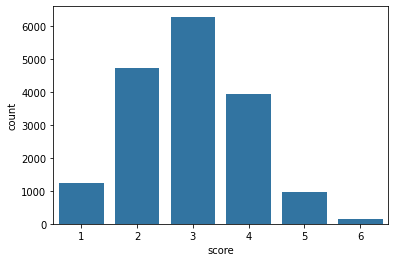

In [73]:
sns.countplot(df_train , x = 'score')

In [74]:
print("longest essay:",max(map(lambda x: len(x.split()), df_train['full_text'].tolist())), "words")

longest essay: 1656 words


In [75]:
df_train.loc[0, "full_text"]

'Many people have car where they live. The thing they don\'t know is that when you use a car alot of thing can happen\xa0like you can get in accidet or\xa0the smoke that the car has is bad to breath\xa0on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban\'s families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden\xa0on the outskirts of freiburd that near the French and Swiss borders. You probaly won\'t see a car in Vauban\'s streets because they are completely "car free" but\xa0If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states an

In [76]:
def preprocessing(text):
    # text = text.lower()
    text = text.strip()
    text = text.replace('\xa0', ' ')
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    return text

In [77]:
preprocessing(df_train.loc[0, "full_text"])

'Many people have car where they live. The thing they don\'t know is that when you use a car alot of thing can happen like you can get in accidet or the smoke that the car has is bad to breath on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban\'s families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden on the outskirts of freiburd that near the French and Swiss borders. You probaly won\'t see a car in Vauban\'s streets because they are completely "car free" but If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states and some where el

In [78]:
texts = [preprocessing(df_train.loc[i, "full_text"]) for i in range(len(df_train))]

In [ ]:
configuration = BertConfig()
bert_model = BertModel(configuration)